In [39]:
import pandas as pd
from pymongo import MongoClient
import sklearn

MONGOHOST = "localhost:27017"
MONGODB = "lod_notebook"

client = MongoClient(MONGOHOST)
db_connect = client[MONGODB]

cur = db_connect["area_data"].find()
df = pd.DataFrame(list(cur))

In [38]:
# row, col
df.shape

(4107, 39)

In [40]:
# 数値データを人口割りする
df_pp = pd.DataFrame()
for k, v in df.iteritems():
    try:
        #集計結果を人口あたりの値に変換する。この値はseriesとして返る
        s = df[k].astype(float)/df.total.astype(float)
        df_pp[k] = s
    except:
        df_pp[k] = df[k]
    df_pp["total"] = df["total"]
    
#  村など病院数などの値が取得できない=NaNとなるデータを今回は含めないようにします
df_pp = df_pp[df_pp.m_byoin.notnull()]
# エリアコードをURLから単純な文字列部分のみに変更します。
df_pp["_id"] = df_pp["_id"].map(lambda x: x[33:-9])
#  標準地域コードで市町村区名の取得出来ないデータも今回は含めないようにします。
df_pp = df_pp[df_pp.city.notnull()]

In [53]:
df_pp.shape

(1907, 39)

In [20]:
# 全く関係ないけど人口の男性がしめる割合をソートしてみて見た
df_pp.loc[:, ["male","pref", "city","total"]].sort_values("male")

,male,pref,city,total
1441,0.421500,京都府,東山区,39312
1402,0.440468,福岡県,中央区,167270
2993,0.444948,和歌山県,古座川町,3088
72,0.446629,北海道,歌志内市,4375
124,0.447135,山口県,阿武町,3717
1065,0.447364,北海道,上ノ国町,5405
3864,0.448307,北海道,神恵内村,1122
1044,0.448315,高知県,奈半利町,3531
3908,0.448358,静岡県,熱海市,39348
2157,0.449571,北海道,上砂川町,4075


In [41]:
# dataのStandarizationのために文字列のカラムをソートして先頭にはずしておきます
df_pp = df_pp.rename(columns={'_id':'_area','city':'_city', 'pref':'_pref'})
df_pp.sort_index(axis=1, inplace=True)
df_pp.fillna(0, inplace=True)
#df_pp.ix[:,3:] 
df_pp.sort_index(axis=1, inplace=True)

,_area,_city,_pref,c_hoikusyo,c_jidou_fukushi,c_jidou_taiki,c_jidou_zaisyo,e_koukou,e_koukou_seito,e_syogaku_jidou,...,p_rikon,p_sibou,p_syussei,p_tennyuu,p_tensyutsu,t_local_tax,total,w_jitiku_syuugyo,w_taikukara_tuukin,w_tatikuhe_tuukin
0,C01644,池田町,北海道,0.000133,0.000133,0.000000,0.014896,0.000133,0.026599,0.041894,...,0.000931,0.014763,0.004256,0.014364,0.018619,91.644900,7519,0.377976,0.079266,0.100013
3,C15101,北区,新潟県,0.000000,0.000351,0.000000,0.000000,0.000026,0.014463,0.052227,...,0.001429,0.010084,0.007056,0.024729,0.028316,0.000000,76953,0.269333,0.159045,0.207581
4,C01400,倶知安町,北海道,0.000000,0.000000,0.000000,0.000000,0.000131,0.034141,0.054899,...,0.001697,0.009008,0.010379,0.067433,0.039755,133.272211,15319,0.463542,0.089170,0.060513
6,C14110,戸塚区,神奈川県,0.000000,0.000144,0.000000,0.000000,0.000018,0.015936,0.054593,...,0.001750,0.007501,0.008549,0.020927,0.019801,0.000000,270897,0.159721,0.179098,0.291919
8,C47348,与那原町,沖縄県,0.000431,0.000554,0.002524,0.039453,0.000062,0.066289,0.077799,...,0.003570,0.009540,0.016803,0.038284,0.037545,85.338278,16247,0.108143,0.189450,0.285960
10,C09344,市貝町,栃木県,0.000251,0.000251,0.000000,0.021894,0.000000,0.000000,0.051475,...,0.002089,0.010863,0.006852,0.014624,0.032757,180.227208,11967,0.202390,0.221359,0.323139
12,C46208,出水市,鹿児島県,0.000289,0.000289,0.000886,0.027904,0.000090,0.045651,0.057308,...,0.001843,0.013753,0.009253,0.015488,0.033091,92.075434,55333,0.384400,0.054109,0.060741
13,C14362,大井町,神奈川県,0.000112,0.000112,0.000000,0.009999,0.000056,0.035696,0.063795,...,0.001899,0.008100,0.005195,0.018435,0.034691,155.608905,17901,0.157086,0.275180,0.327077
15,C43443,益城町,熊本県,0.000245,0.000307,0.003188,0.027929,0.000000,0.000000,0.060856,...,0.001839,0.009565,0.010669,0.021767,0.037464,102.625207,32618,0.184990,0.241738,0.272028
18,C01604,新冠町,北海道,0.000175,0.000350,0.000000,0.018703,0.000000,0.000000,0.056284,...,0.001573,0.012410,0.007516,0.045447,0.045447,106.249432,5721,0.379654,0.094040,0.121133


In [ ]:
df_ns = df_pp

In [42]:
# 数値データを標準化
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_pp.ix[:,3:] = scale.fit_transform(df_pp.ix[:,3:])

In [24]:
# データをMinMaxScalerで正規化した場合
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_pp.ix[:,2:] = mms.fit_transform(df_pp.ix[:,2:])

In [43]:
# areacodeをindexにセット
df_pp.set_index('_area', inplace=True)

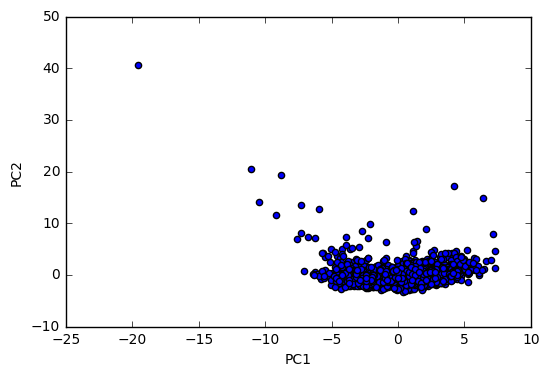

In [10]:
# 主成分分析
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pd.DataFrame(pca.fit_transform(df_pp.ix[:,2:]), columns=('PC1', 'PC2'))
pca_df["area"] = df_pp.index
pca_df.plot(kind='scatter', x='PC1', y='PC2')

In [11]:
# dataframeをnumpy arrayへ変換。標準化した数値データのみ。
area_array = df_pp.ix[:,2:].as_matrix()

In [12]:
# k-measでクラスタリング。クラスタ数は１０。
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=12, max_iter=10000000).fit(area_array)

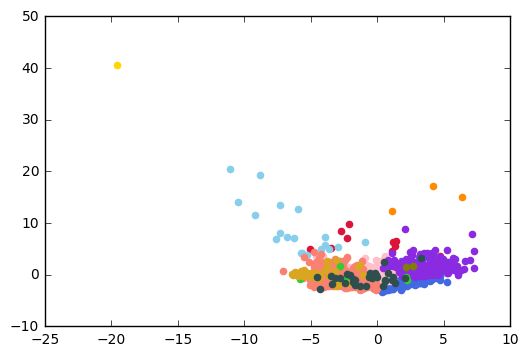

In [13]:
# PCAの結果をk-meansの結果でラベルしてプロット
import pylab as pl
pca0 = pca_df[k_means.labels_ == 0]
pca1 = pca_df[k_means.labels_ == 1]
pca2 = pca_df[k_means.labels_ == 2]
pca3 = pca_df[k_means.labels_ == 3]
pca4 = pca_df[k_means.labels_ == 4]
pca5 = pca_df[k_means.labels_ == 5]
pca6 = pca_df[k_means.labels_ == 6]
pca7 = pca_df[k_means.labels_ == 7]
pca8 = pca_df[k_means.labels_ == 8]
pca9 = pca_df[k_means.labels_ == 9]
pca10 = pca_df[k_means.labels_ == 10]
pca11 = pca_df[k_means.labels_ == 11]
pl.scatter(pca0['PC1'], pca0['PC2'], color='Crimson')
pl.scatter(pca1['PC1'], pca1['PC2'], color='RoyalBlue')
pl.scatter(pca2['PC1'], pca2['PC2'], color='DarkOrange')
pl.scatter(pca3['PC1'], pca3['PC2'], color='Gold')
pl.scatter(pca4['PC1'], pca4['PC2'], color='Pink')
pl.scatter(pca5['PC1'], pca5['PC2'], color='SkyBlue')
pl.scatter(pca6['PC1'], pca6['PC2'], color='BlueViolet')
pl.scatter(pca7['PC1'], pca7['PC2'], color='Salmon')
pl.scatter(pca8['PC1'], pca8['PC2'], color='LimeGreen')
pl.scatter(pca9['PC1'], pca9['PC2'], color='Olive')
pl.scatter(pca10['PC1'], pca10['PC2'], color='goldenrod')
pl.scatter(pca11['PC1'], pca11['PC2'], color='darkslategray')

In [14]:
df_ori = df
df_ori = df_ori.rename(columns={'_id':'_area','city':'_city', 'pref':'_pref'})
df_ori["_area"] = df_ori["_area"].map(lambda x: x[33:-9])
df_ori.set_index('_area', inplace=True)
df_ori = df_ori[df_ori.m_byoin.notnull()]
df_ori.fillna("-", inplace=True)
df_ori.to_json('data/area_data_36.json', orient='index', force_ascii=False)

#df_pp.ix[:, :2].to_json('data/area_name.json', orient='index', force_ascii=False)
pca_df.to_json('data/pca_36.json', orient='records')

# ラベルしたデータ（array）をデータフレームに追加。
# area_name.jsonがdict型なので、areacodeで参照しやすいようにこれに追加して出力する
#  都道府県名、市町村区名のdataframeを生成し、さらにk-means.labels_のカラムを追加する。
area_dict = df_pp.ix[:, :2]
area_dict['label'] =k_means.labels_
area_dict.to_json('data/area_name.json', orient='index', force_ascii=False)

In [36]:
# カテゴリ毎にデータをfilterして、計算結果を出力する
# カテゴリは便宜的に医療・福祉・子育て・教育（m_*, c_*, e_*）、産業・仕事(i_*, w_*)の２つとする。人口比の数値で標準化するため、データには人口も含める
# !!!データフレームは標準化前のデータフレームを用いて別途StandardScalerを適用する!!!!!!
df_m_c_e = df_ns.ix[:, df_ns.columns.map(lambda x: x.startswith(('_', 'm_', 'c_', 'e_')))]
# df_m_c_e.shape
# => (1907, 20)
df_i_w = df_ns.ix[:, df_ns.columns.map(lambda x: x.startswith(('_', 'i_', 'w_')))]
# df_i_w.shape
# => (1907, 10)

scale = StandardScaler()
df_m_c_e.ix[:,2:] = scale.fit_transform(df_m_c_e.ix[:,2:])
df_i_w.ix[:,2:] = scale.fit_transform(df_i_w.ix[:,2:])

/usr/local/var/pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,_city,_pref,c_hoikusyo,c_jidou_fukushi,c_jidou_taiki,c_jidou_zaisyo,e_koukou,e_koukou_seito,e_syogaku_jidou,e_syogaku_kyoin,e_syogakukou,e_tyuugaku,e_tyuugaku_kyoin,e_tyuugaku_seito,e_yochien,e_yochien_zaien,m_byoin,m_ishi,m_kaigo_sisetsu,m_sinryojyo
_area,,,,,,,,,,,,,,,,,,,,
C01644,池田町,北海道,-0.530705,-0.852375,-0.261102,-0.267701,1.106260,0.322784,-0.780580,0.254435,0.147327,-0.046877,-0.056666,-0.071981,0.076053,-0.772196,1.040883,-0.326397,0.423964,0.049297
C15101,北区,新潟県,-1.190360,0.179576,-0.261102,-1.729860,-0.371705,-0.354633,0.196980,-0.516070,-0.348987,-0.046877,-0.056666,-0.071981,-0.346270,-0.720068,-0.578046,-0.247378,-0.258560,-0.314105
C01400,倶知安町,北海道,-1.190360,-1.482326,-0.261102,-1.729860,1.072565,0.743736,0.449815,0.269113,-0.009292,-0.046877,-0.056666,-0.071981,0.466196,1.938059,0.016360,0.351346,-0.255513,-0.095758
C14110,戸塚区,神奈川県,-1.190360,-0.800415,-0.261102,-1.729860,-0.475746,-0.272435,0.420823,-0.554415,-0.490454,-0.046877,-0.056666,-0.071981,-0.291298,0.844993,-0.356917,0.069382,-0.614195,-0.206454
C47348,与那原町,沖縄県,0.946626,1.141509,7.335840,2.142909,0.119446,2.538245,2.616307,-0.153926,-0.447869,-0.046877,-0.056666,-0.071981,0.396748,1.383173,-0.040050,0.220416,-0.292926,-0.170203
C09344,市貝町,栃木県,0.053045,-0.294910,-0.261102,0.419220,-0.730675,-1.161968,0.125855,-0.247144,-0.172610,-0.046877,-0.056666,-0.071981,-0.230861,0.393863,-0.971254,-0.608558,-0.910512,-0.489060
C46208,出水市,鹿児島県,0.243849,-0.112697,2.404775,1.009189,0.517397,1.386231,0.677670,-0.121501,-0.128607,-0.046877,-0.056666,-0.071981,0.260171,-0.006026,-0.150988,-0.107708,-0.185164,-0.054182
C14362,大井町,神奈川県,-0.636207,-0.953126,-0.261102,-0.748310,0.040897,0.830575,1.291458,-0.188958,-0.351890,-0.046877,-0.056666,-0.071981,0.290822,0.815161,-0.126091,-0.495794,-0.349989,-0.385147
C43443,益城町,熊本県,0.026133,-0.030182,9.337416,1.011700,-0.730675,-1.161968,1.013374,-0.254928,-0.382738,-0.046877,-0.056666,-0.071981,-0.178642,0.440516,0.420241,-0.152718,0.012346,-0.341816


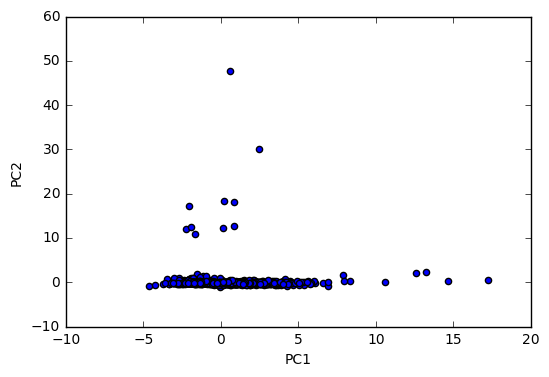

In [44]:
pca = PCA(n_components = 2)
pca_mce = pd.DataFrame(pca.fit_transform(df_m_c_e.ix[:,2:]), columns=('PC1', 'PC2'))
pca_mce["area"] = df_m_c_e.index
pca_mce.plot(kind='scatter', x='PC1', y='PC2')

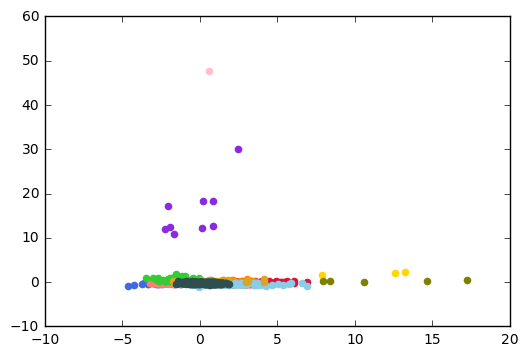

In [47]:
area_array = df_m_c_e.ix[:,2:].as_matrix()
k_means_mce = KMeans(n_clusters=12, max_iter=10000000).fit(area_array)

pca0 = pca_mce[k_means_mce.labels_ == 0]
pca1 = pca_mce[k_means_mce.labels_ == 1]
pca2 = pca_mce[k_means_mce.labels_ == 2]
pca3 = pca_mce[k_means_mce.labels_ == 3]
pca4 = pca_mce[k_means_mce.labels_ == 4]
pca5 = pca_mce[k_means_mce.labels_ == 5]
pca6 = pca_mce[k_means_mce.labels_ == 6]
pca7 = pca_mce[k_means_mce.labels_ == 7]
pca8 = pca_mce[k_means_mce.labels_ == 8]
pca9 = pca_mce[k_means_mce.labels_ == 9]
pca10 = pca_mce[k_means_mce.labels_ == 10]
pca11 = pca_mce[k_means_mce.labels_ == 11]
pl.scatter(pca0['PC1'], pca0['PC2'], color='Crimson')
pl.scatter(pca1['PC1'], pca1['PC2'], color='RoyalBlue')
pl.scatter(pca2['PC1'], pca2['PC2'], color='DarkOrange')
pl.scatter(pca3['PC1'], pca3['PC2'], color='Gold')
pl.scatter(pca4['PC1'], pca4['PC2'], color='Pink')
pl.scatter(pca5['PC1'], pca5['PC2'], color='SkyBlue')
pl.scatter(pca6['PC1'], pca6['PC2'], color='BlueViolet')
pl.scatter(pca7['PC1'], pca7['PC2'], color='Salmon')
pl.scatter(pca8['PC1'], pca8['PC2'], color='LimeGreen')
pl.scatter(pca9['PC1'], pca9['PC2'], color='Olive')
pl.scatter(pca10['PC1'], pca10['PC2'], color='goldenrod')
pl.scatter(pca11['PC1'], pca11['PC2'], color='darkslategray')

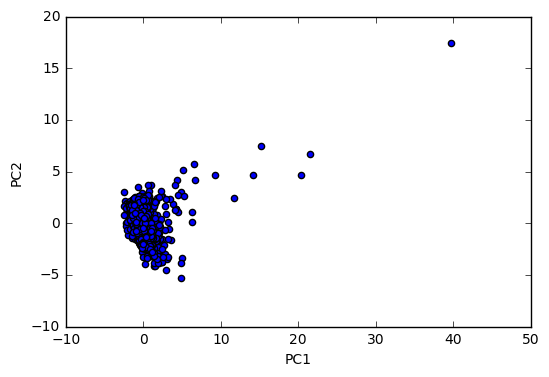

In [45]:
pca_iw = pd.DataFrame(pca.fit_transform(df_i_w.ix[:,2:]), columns=('PC1', 'PC2'))
pca_iw["area"] = df_i_w.index
pca_iw.plot(kind='scatter', x='PC1', y='PC2')

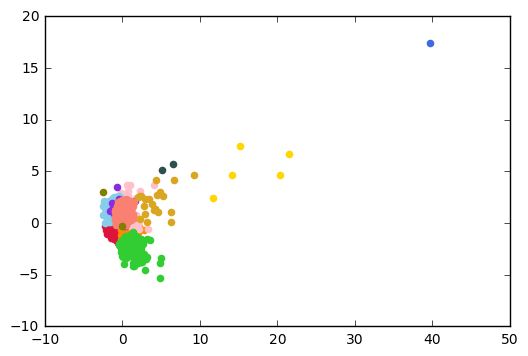

In [48]:
area_array = df_i_w.ix[:,2:].as_matrix()
k_means_iw = KMeans(n_clusters=12, max_iter=10000000).fit(area_array)

pca0 = pca_iw[k_means_iw.labels_ == 0]
pca1 = pca_iw[k_means_iw.labels_ == 1]
pca2 = pca_iw[k_means_iw.labels_ == 2]
pca3 = pca_iw[k_means_iw.labels_ == 3]
pca4 = pca_iw[k_means_iw.labels_ == 4]
pca5 = pca_iw[k_means_iw.labels_ == 5]
pca6 = pca_iw[k_means_iw.labels_ == 6]
pca7 = pca_iw[k_means_iw.labels_ == 7]
pca8 = pca_iw[k_means_iw.labels_ == 8]
pca9 = pca_iw[k_means_iw.labels_ == 9]
pca10 = pca_iw[k_means_iw.labels_ == 10]
pca11 = pca_iw[k_means_iw.labels_ == 11]
pl.scatter(pca0['PC1'], pca0['PC2'], color='Crimson')
pl.scatter(pca1['PC1'], pca1['PC2'], color='RoyalBlue')
pl.scatter(pca2['PC1'], pca2['PC2'], color='DarkOrange')
pl.scatter(pca3['PC1'], pca3['PC2'], color='Gold')
pl.scatter(pca4['PC1'], pca4['PC2'], color='Pink')
pl.scatter(pca5['PC1'], pca5['PC2'], color='SkyBlue')
pl.scatter(pca6['PC1'], pca6['PC2'], color='BlueViolet')
pl.scatter(pca7['PC1'], pca7['PC2'], color='Salmon')
pl.scatter(pca8['PC1'], pca8['PC2'], color='LimeGreen')
pl.scatter(pca9['PC1'], pca9['PC2'], color='Olive')
pl.scatter(pca10['PC1'], pca10['PC2'], color='goldenrod')
pl.scatter(pca11['PC1'], pca11['PC2'], color='darkslategray')

In [50]:
# 測度をカテゴリに分けて解析したDataFrameを保存
pca_mce.to_json('data/pca_mce.json', orient='records')
area_mce= df_m_c_e.ix[:, :2]
area_mce['label'] =k_means_mce.labels_
area_mce.to_json('data/area_mce_name.json', orient='index', force_ascii=False)

pca_iw.to_json('data/pca_iw.json', orient='records')
area_iw= df_i_w.ix[:, :2]
area_iw['label'] =k_means_iw.labels_
area_iw.to_json('data/area_iw_name.json', orient='index', force_ascii=False)